In [ ]:
#based on NASA handbook

def resolution(lamb, antenna, range):
  '''
  lamb = wavelength
    antenna = antenna diameter
    range = range to target

  '''
  az_res = (lamb / antenna) * range
  return az_res


print(resolution(0.0555,12.3, 900*1000))

def antenna(lamb, resolution, range):
  '''
  lamb = wavelength
  resolution = resolution
  range = range to target
  '''
  antenna = (lamb/resolution)*range
  return antenna

antenna(0.0555, 20, 900*1000)

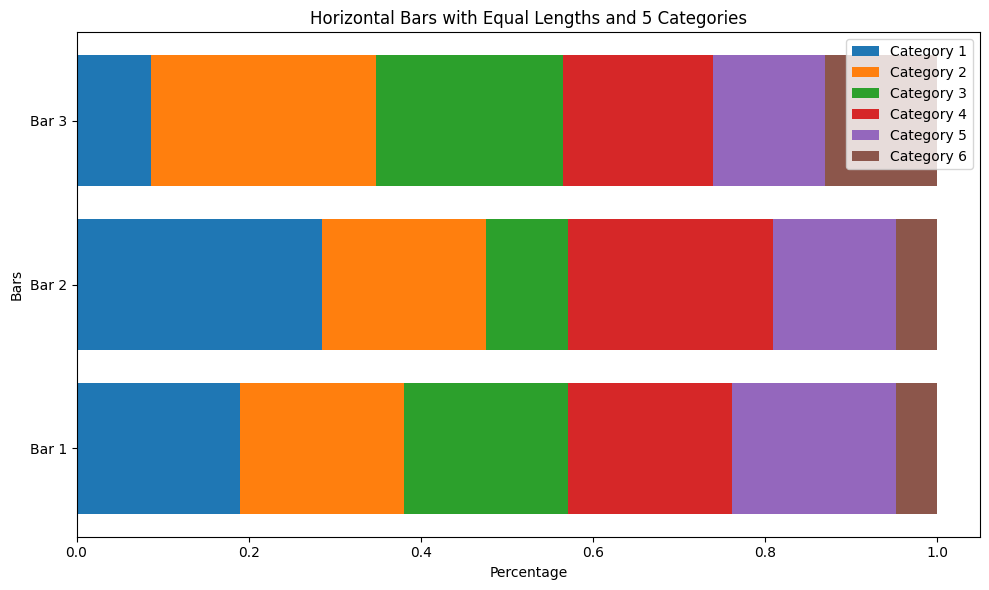

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6']
num_categories = len(categories)
total_bars = 3

# Define the percentages for each category in each bar
values = np.array([
    [20.0, 20.0, 20.0, 20.0, 20.0, 5.0],  # Percentages for Bar 1
    [30.0, 20.0, 10.0, 25.0, 15.0, 5.0],  # Percentages for Bar 2
    [10.0, 30.0, 25.0, 20.0, 15.0, 15.0]   # Percentages for Bar 3
])

# Normalize the values so that each row sums up to 100
values /= np.sum(values, axis=1)[:, np.newaxis]

# Calculate the positions for the bars
bar_positions = np.arange(total_bars)

# Plotting the bars
plt.figure(figsize=(10, 6))
for i in range(num_categories):
    plt.barh(bar_positions, values[:, i], left=np.sum(values[:, :i], axis=1), label=categories[i])

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Bars')
plt.title('Horizontal Bars with Equal Lengths and 5 Categories')
plt.yticks(bar_positions, [f'Bar {i+1}' for i in range(total_bars)])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
#find sin of angle
import math

angle = 40
sin_theta = math.sin(math.radians(angle))

20 / sin_theta

31.11447653720825

In [37]:
pulse_length = 10*10**-6
c = 300000 * 1000
angle = 40
cos_theta = math.cos(math.radians(angle))
sin_theta = math.sin(math.radians(angle))
slant_range = (c * pulse_length) / 2
print(round(slant_range))
ground_range2 =slant_range / sin_theta

print(round(ground_range2))


1500
2334


In [16]:
from math import sin, cos, radians, sqrt, pi
def penetration_depth(wave_lambda, epsilon_prime, epsilon_double_prime):
    d = (wave_lambda * sqrt(epsilon_prime)) / (2*pi*epsilon_double_prime)
    return d



prime = 1.5
double_prime = 0.001
x = penetration_depth(0.056,prime,double_prime)
print(double_prime/prime,x)


0.0006666666666666666 10.915755217271464


Incidence angle: find the center of the incidence angle map in metadata. Center is found this way

width of scene / 2

height of scene / 2

find the angle at the center

Azimuth and range spacing is found in metadata
rest is easy

based of SNAP source data

https://github.com/senbox-org/s1tbx/blob/master/s1tbx-op-sar-processing/src/main/java/org/esa/s1tbx/sar/gpf/MultilookOp.java#L501

In [7]:
import math
from math import sin, radians

def getDerivedParameters(rangeSpacing, azimuthSpacing, nRgLooks, incidenceAngleAtCentreRangePixel):

    srgrFlag = True
    groundRangeSpacing = rangeSpacing
    if srgrFlag:
        groundRangeSpacing = rangeSpacing / sin(radians(incidenceAngleAtCentreRangePixel))

    nAzLooks = nRgLooks * groundRangeSpacing / azimuthSpacing
    if nAzLooks < 1.0:
        nAzLooks = 1
        # nRgLooks = round(azimuthSpacing / groundRangeSpacing)
    else:
        nAzLooks = round(nAzLooks)
    
    meanGRSqaurePixel = (nRgLooks * groundRangeSpacing + nAzLooks * azimuthSpacing) * 0.5
    return nAzLooks, nRgLooks, round(meanGRSqaurePixel, 2)

az,rg,sqr = getDerivedParameters(2.33,13.86, 135, 39.07)
print("azimuthSpacing" , az)
print("rangeSpacing", rg)
print("meanGRSqaurePixel", sqr)

azimuthSpacing 36
rangeSpacing 135
meanGRSqaurePixel 499.02


In [107]:
from pyroSAR.ancillary import multilook_factors
rlks, azlks = multilook_factors(source_rg=2.33, source_az=13.86, target=497.16,
                                geometry='SLANT_RANGE', incidence=39.07)
print(rlks, azlks)

135 36
